### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-06,404211,3993160,605906,526892,233958,128532,127704,137005,111420,91118,80952,110019,85095,4848,193588
2021-07-07,405028,4001746,606218,528540,234192,128565,127718,137718,111448,91148,80969,110578,85261,4848,193743
2021-07-08,405939,4010591,606475,530179,234458,128601,127731,138441,111473,91197,80997,111155,85397,4848,193909
2021-07-09,407145,4018993,606993,531688,234675,128631,127756,139156,111492,91232,81003,111731,85543,4848,193909
2021-07-10,408040,4024998,607132,532893,234907,128665,127768,139896,111511,91239,81003,111731,85694,4848,193230


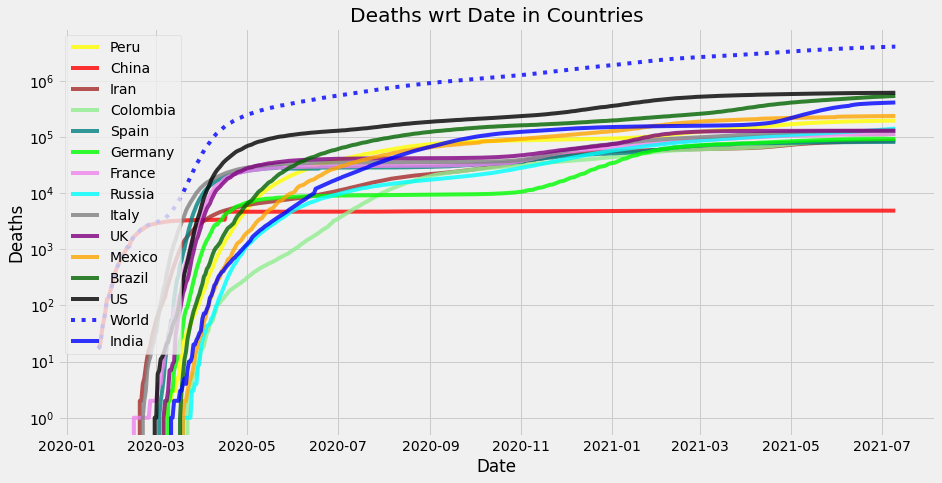

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-06,43733,453745,24224,62504,7989,28629,907,22926,3588,713,14137,26721,16080,58,2374
2021-07-07,45892,463849,22931,54022,8507,32061,1010,23510,4083,992,17384,24229,17212,18,2586
2021-07-08,43393,481535,20061,53725,9452,32096,1391,24361,4446,903,17317,23275,23391,26,2549
2021-07-09,42766,502675,48241,57737,9319,35885,1386,25299,4639,885,21879,21536,16596,27,0
2021-07-10,41506,399937,9038,48504,9581,31835,1394,24607,4696,809,0,0,11664,1,4629


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-06,69602,400013,14159,58872,4119,17038,1388,18480,2588,1495,7278,27151,11627,25,3072
2021-07-07,68021,404268,14744,58549,4412,18040,1363,18815,2688,1462,7952,26956,11999,24,3040
2021-07-08,66379,409420,15098,58227,4748,18977,1365,19185,2805,1424,8576,26711,12759,25,3007
2021-07-09,64805,415637,17308,58194,5053,20104,1366,19592,2927,1388,9463,26366,13015,25,2806
2021-07-10,63252,414590,16757,57548,5354,20886,1368,19927,3045,1350,8832,24608,12925,23,2928


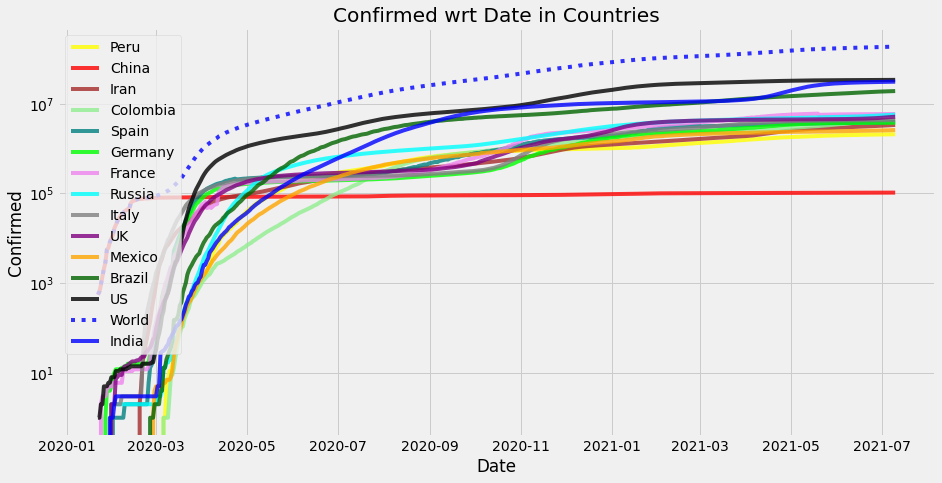

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-06,930,8565,334,1780,269,37,24,726,35,50,18,553,146,0,199
2021-07-07,817,8586,312,1648,234,33,14,713,28,30,17,559,166,0,155
2021-07-08,911,8845,257,1639,266,36,13,723,25,49,28,577,136,0,166
2021-07-09,1206,8402,518,1509,217,30,25,715,19,35,6,576,146,0,0
2021-07-10,895,6005,139,1205,232,34,12,740,19,7,0,0,151,0,-679


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-06,1087.37,8001.03,234.28,1544.83,167.80,18.41,28.72,616.68,33.25,42.10,18.02,601.00,137.71,0.15,220.97
2021-07-07,1053.58,8074.15,243.99,1557.73,176.08,20.24,26.88,628.72,32.59,40.59,17.89,595.75,141.24,0.14,212.72
2021-07-08,1035.76,8170.51,245.62,1567.89,187.32,22.21,25.14,640.51,31.64,41.64,19.16,593.41,140.59,0.12,206.88
2021-07-09,1057.04,8199.45,279.67,1560.53,191.03,23.18,25.13,649.82,30.06,40.81,17.51,591.23,141.27,0.10,181.02
2021-07-10,1036.78,7925.14,262.08,1516.09,196.15,24.53,23.48,661.09,28.68,36.58,15.32,517.33,142.48,0.09,73.52


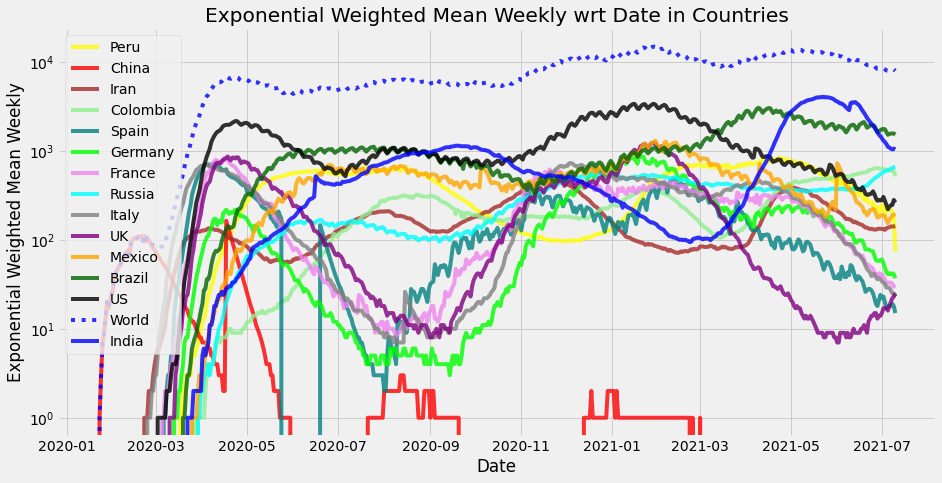

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

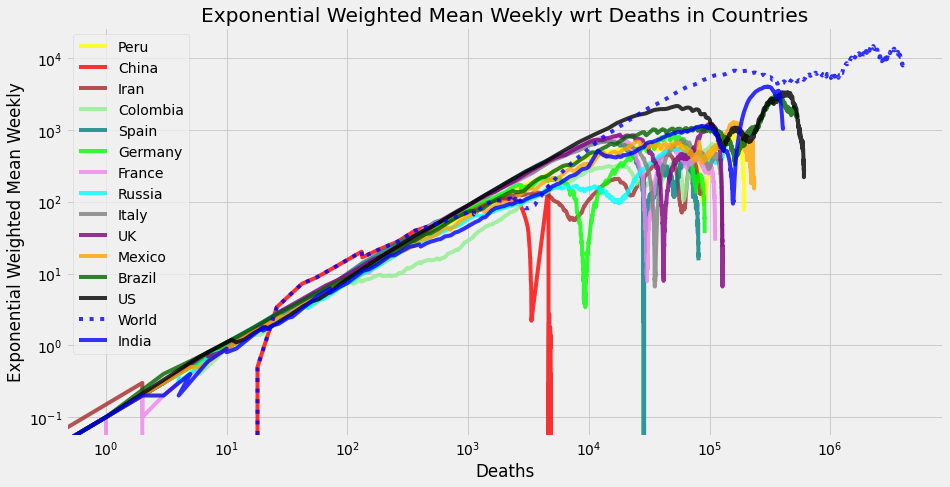

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

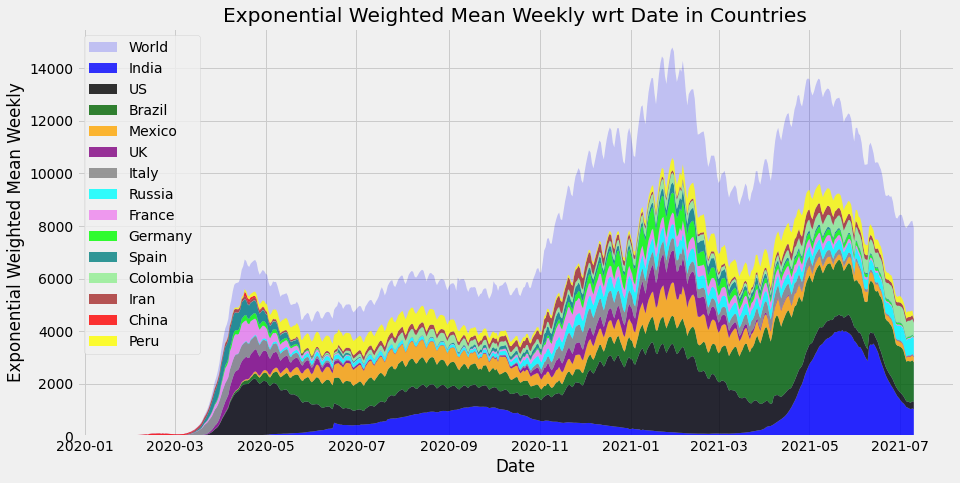

In [20]:
stackplotter(AVG, name)

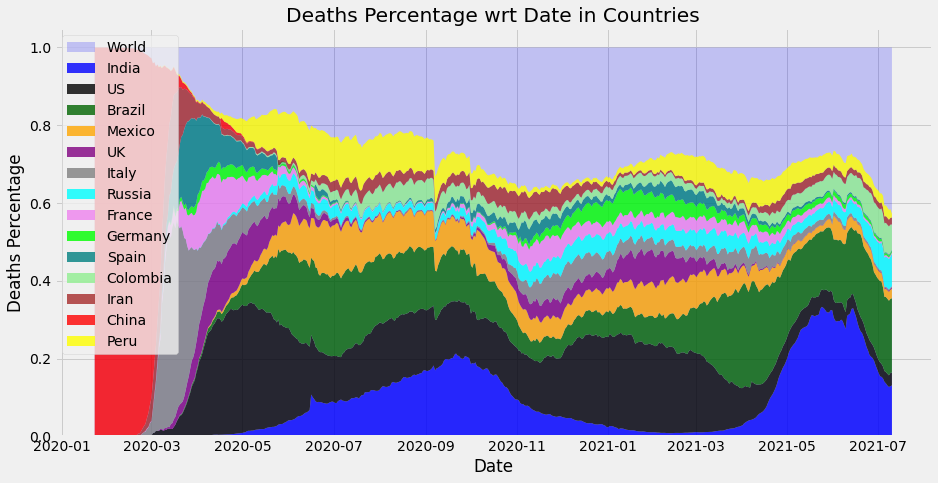

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

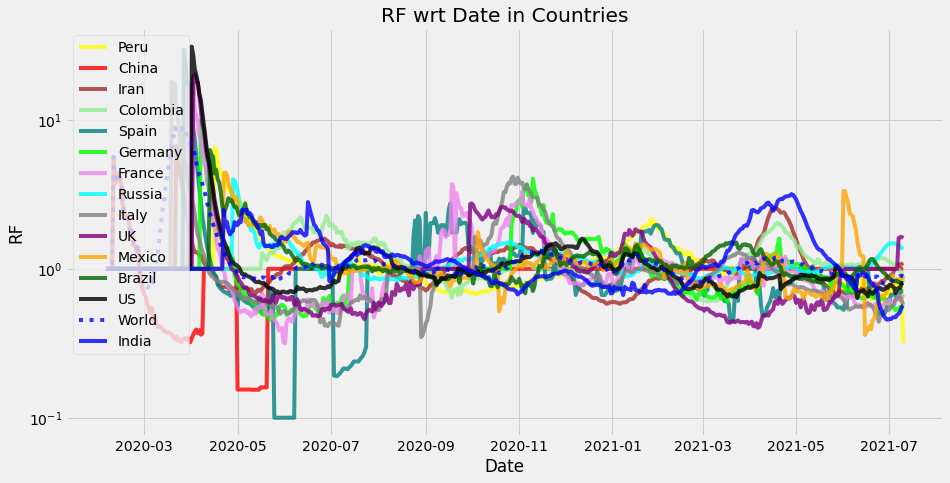

In [23]:
plotter(Reproductivity, 'RF')

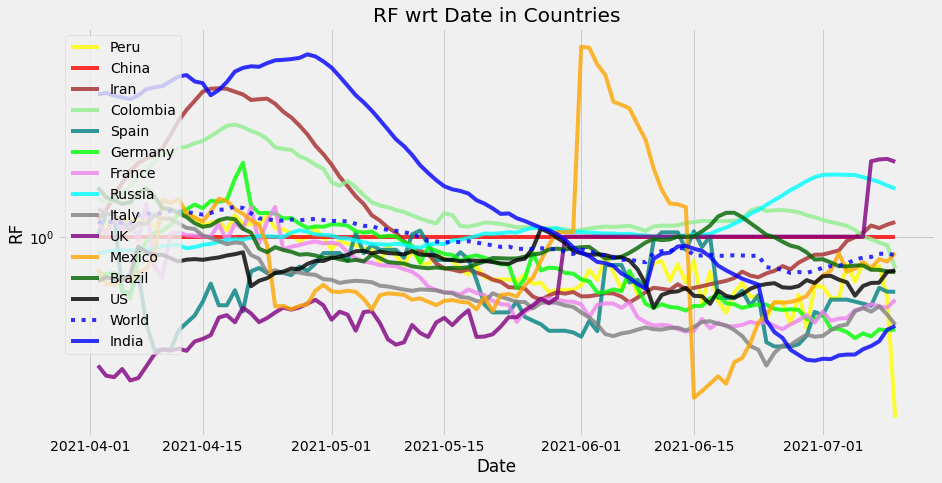

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

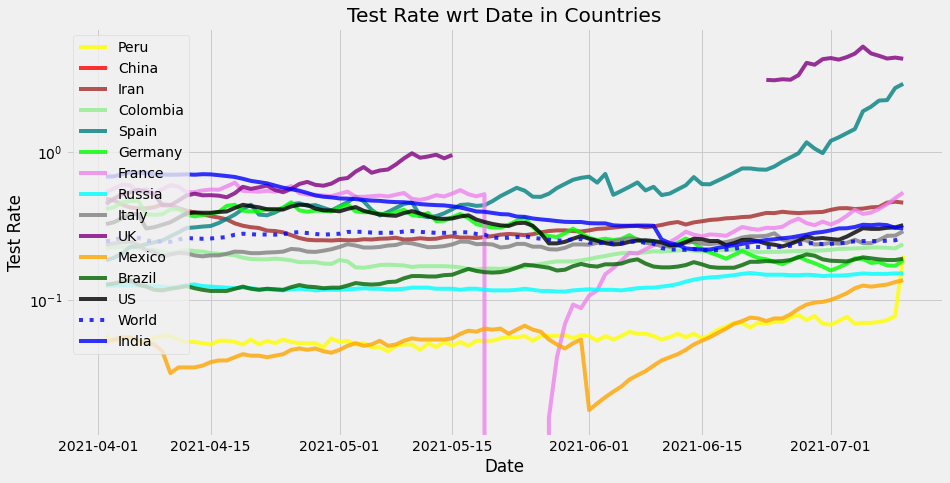

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

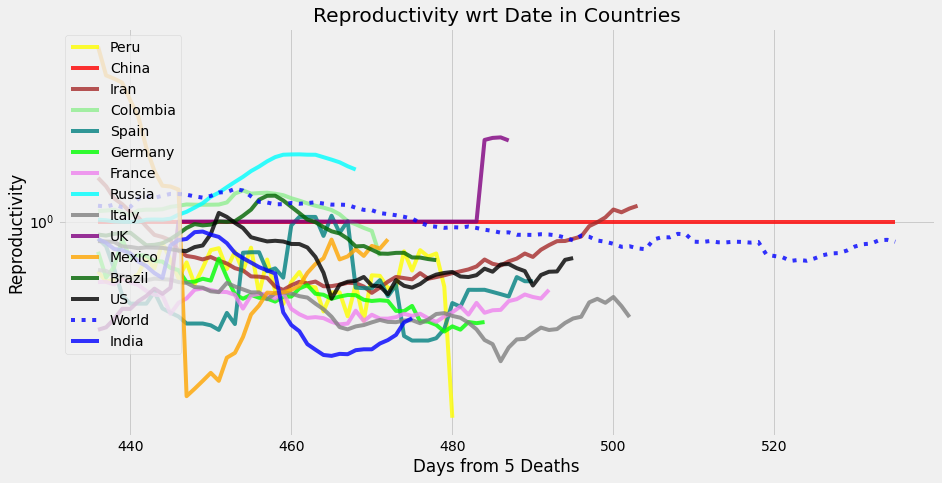

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

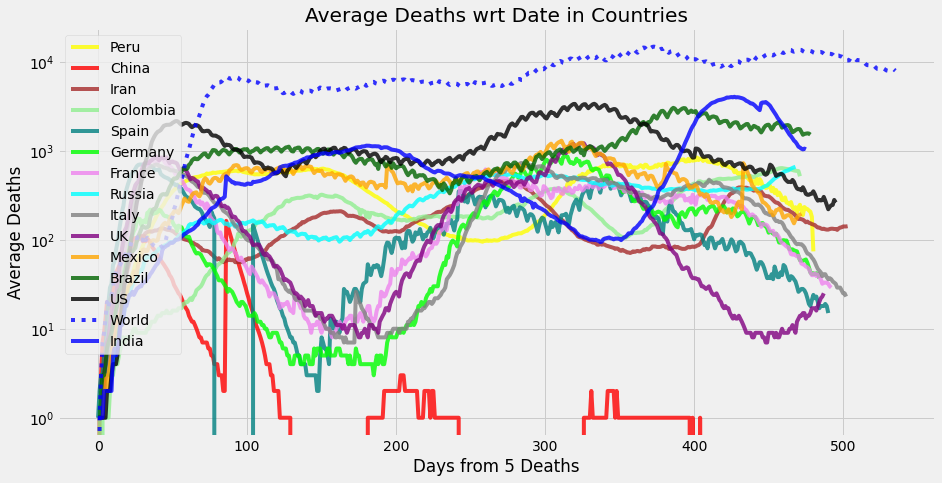

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

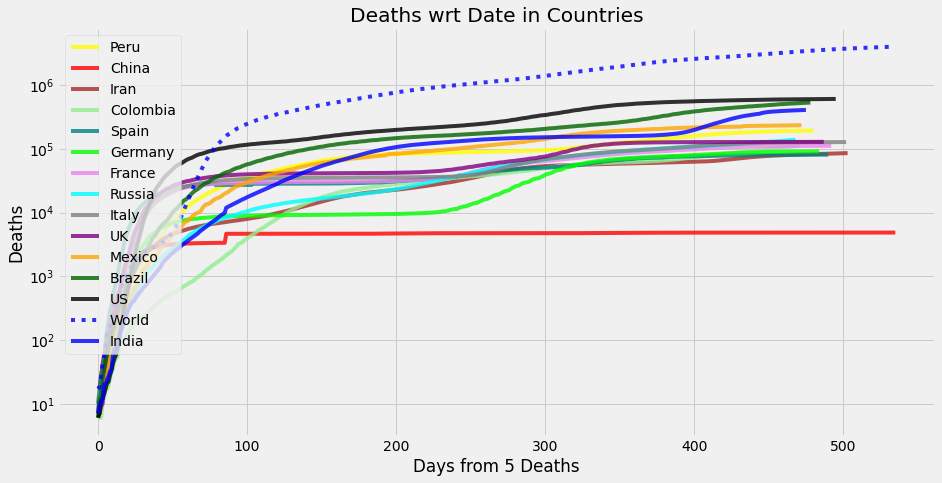

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4024998,6005,7750.57,7925.14,0.8887,186459999,0.262,414590,805.00
US,607132,139,234.14,262.08,0.8075,33847784,0.320,16757,121.43
Brazil,532893,1205,1329.43,1516.09,0.7980,19069003,0.190,57548,106.58
India,408040,895,862.14,1036.78,0.5677,30837222,0.305,63252,81.61
Mexico,234907,232,189.57,196.15,0.9012,2586721,0.136,5354,46.98
Peru,193230,-679,77.57,73.52,0.3171,2078815,0.199,2928,38.65
Russia,139896,740,701.29,661.09,1.3561,5688807,0.151,19927,27.98
UK,128665,34,27.71,24.53,1.6075,5107780,4.257,20886,25.73
Italy,127768,12,18.71,23.48,0.5718,4269885,0.291,1368,25.55


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4024998,6005,7750.57,7925.14,0.8887,186459999,0.262,414590,805.00
Brazil,532893,1205,1329.43,1516.09,0.7980,19069003,0.190,57548,106.58
India,408040,895,862.14,1036.78,0.5677,30837222,0.305,63252,81.61
Indonesia,65457,826,775.71,647.86,2.1798,2491006,0.177,22950,13.09
Russia,139896,740,701.29,661.09,1.3561,5688807,0.151,19927,27.98
Colombia,111731,0,488.14,517.33,0.8172,4471622,0.238,24608,22.35
Argentina,98501,353,415.29,434.68,0.8363,4639098,0.223,19358,19.70
South Africa,64138,265,375.86,310.52,2.0428,2179297,0.257,15934,12.83
US,607132,139,234.14,262.08,0.8075,33847784,0.320,16757,121.43


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4024998


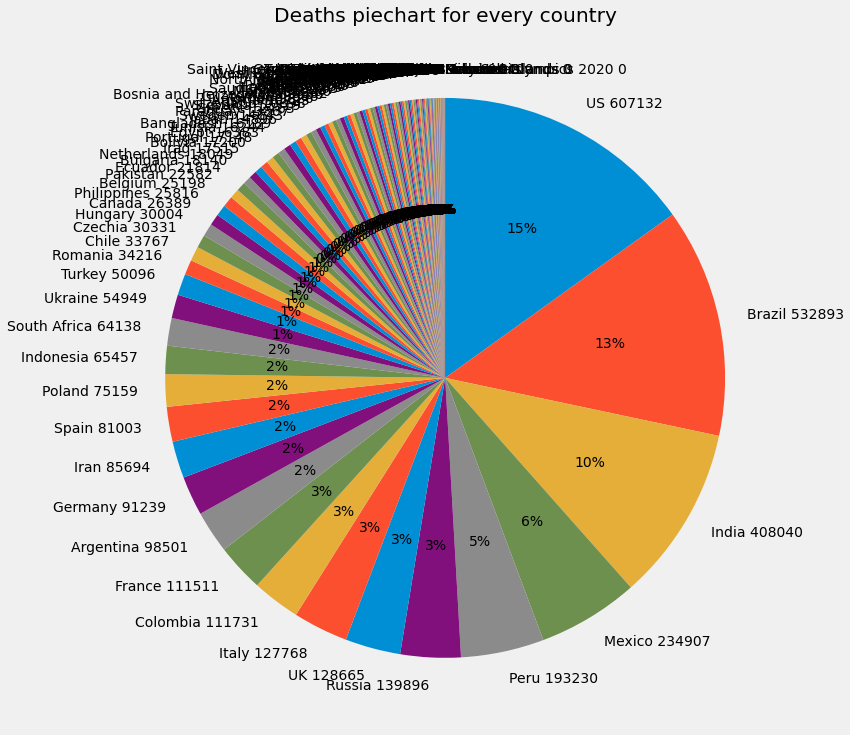

In [35]:
piechart('Deaths')

World total:  7750


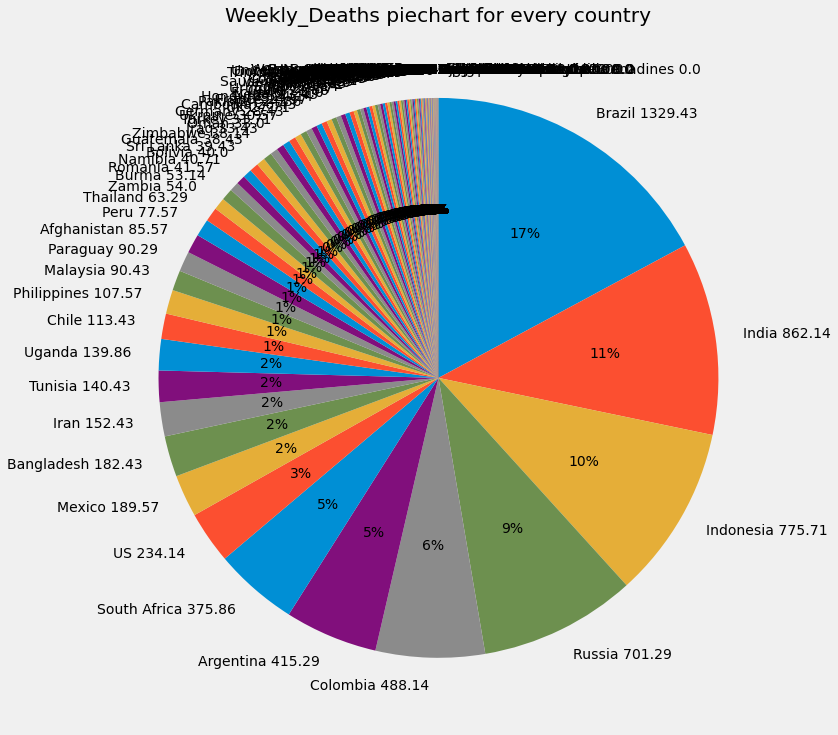

In [36]:
piechart('Weekly_Deaths')

World total:  6005


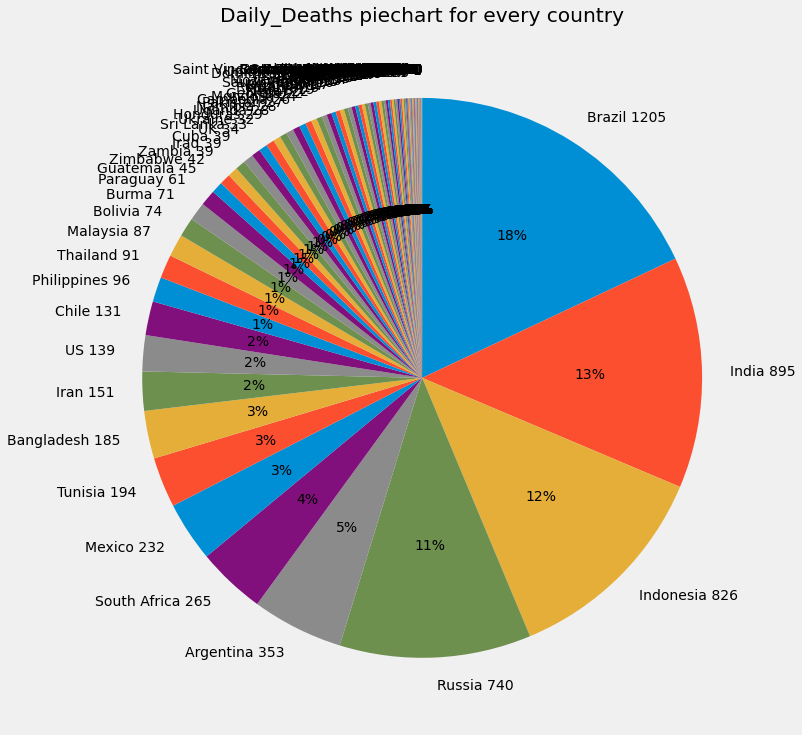

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-11


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

804999600.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master af52546] `date` update
 1 file changed, 82 insertions(+), 9 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   95446c1..af52546  master -> master
